In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### 범주형 / 연속형 : 범주형 따른 상관관계 확인

#### 선정 변수 : channel(항목 2), Mileage\[:500\](정규분포)
- 분석 내용 : channel 중 서비스방문과 홈쇼핑에 따른 마일리지가 평균 차이가 있는가 ?
    - 귀무가설 : 평균에 차이 없다.
    - 대립가설 : 평균에 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : pvalue=0.936, 귀무가설이 참.
    - 사실 결론 : 평균에 차이 없다.

In [3]:
## 검증 대상 항목만 필터링 and 2000개만 추출(정규분포 자료 획득)
condition = (df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송')
df_channel_Mileage = df_TOCC[condition][['channel','Mileage']][:2000]
df_channel_Mileage[:2]

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0


In [16]:
df_channel_Mileage.isnull().sum()

channel    0
Mileage    0
dtype: int64

In [15]:
df_channel_Mileage = df_channel_Mileage.dropna()

In [17]:
df_channel_Mileage['channel'].value_counts()

서비스 방문    855
홈쇼핑/방송    841
Name: channel, dtype: int64

##### 정규성 검증
- row 갯수가 5천개를 기준으로 검증 방식 분리

In [18]:
stats.shapiro(df_channel_Mileage['Mileage'])

ShapiroResult(statistic=0.9926883578300476, pvalue=1.8700838211316295e-07)

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

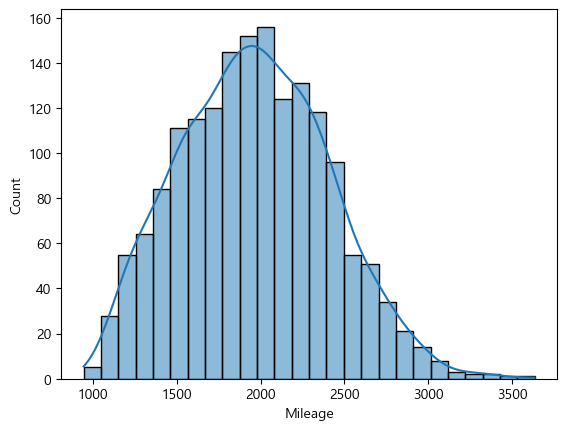

In [25]:
sns.histplot(data=df_channel_Mileage, x='Mileage', kde=True)

##### 등분산 검증
- 신은 위대하다. 즉, 분산이 같다. 
- 결과 : pvalue=0.74로 등분산이다.

<AxesSubplot:xlabel='channel', ylabel='count'>

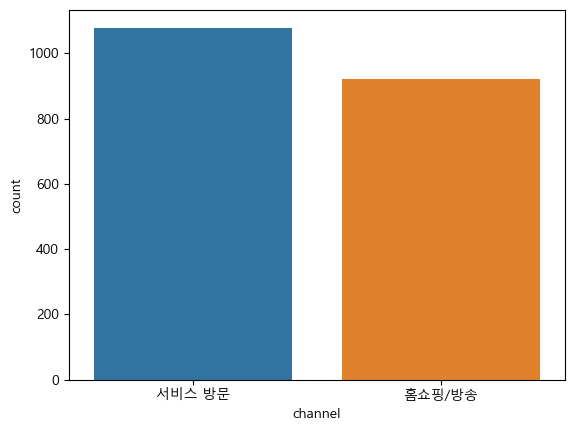

In [8]:
sns.countplot(data=df_channel_Mileage, x='channel')

In [21]:
df_service = df_channel_Mileage[df_channel_Mileage['channel'] == '서비스 방문']
df_service[:2]

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0


In [22]:
df_homeshopping = df_channel_Mileage[df_channel_Mileage['channel'] == '홈쇼핑/방송']
df_homeshopping[:2]

,channel,Mileage
2,홈쇼핑/방송,2363.0
6,홈쇼핑/방송,2348.0


In [23]:
stats.levene(df_service['Mileage'], df_homeshopping['Mileage'])

LeveneResult(statistic=0.10621828323889944, pvalue=0.7445315946688518)

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

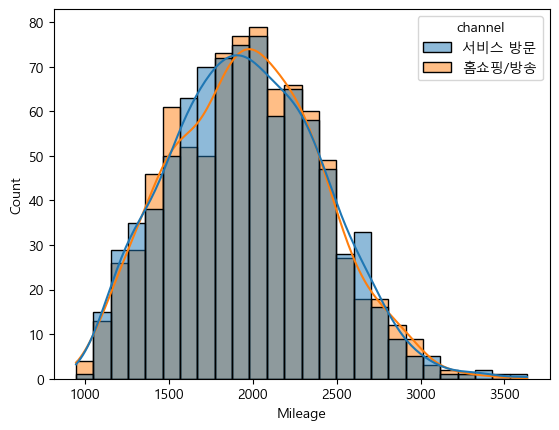

In [26]:
sns.histplot(data=df_channel_Mileage, x='Mileage', kde=True, hue='channel')

In [27]:
stats.ttest_ind(df_service['Mileage'], df_homeshopping['Mileage'], equal_var=True )  # 등분산 일때

Ttest_indResult(statistic=-0.08025301134894845, pvalue=0.9360455086241137)